The basis of this project is to measure a real world phenomenon across one hundred data points with four different variables, using a synthesised data set.

Recently my workplace offered all employees access to vaccination for the flu and I decided to try model my project on this concept.  

My project is based on the idea of 100 staff members who avail of a flu vaccine and the variables to represent this data are - 
* Their age  
* The department they work in 
* Their gender
* How many times they have availed of the vaccine in the past 5 years

I did some online reading to determine they types of variables that these data are.  The Age veriable is a [continuous numerical value](http://www-ist.massey.ac.nz/dstirlin/CAST/CAST/Hstructures/structures_c2.html) which means that it may contain any value within a particular range, in this case, that range is from age 23 to 65 (which is approximately the age range of working adults).  Department of work and gender is a nominal categorical values, in that they have [two or more categories, but there is no intrinsic ordering to the categories](https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/).  If the workers have received the same vaccine in the past and how many times if they have is 

If I was to perform this analysis on actual data, rather than synthesised, I would carry out a survey of vaccinated staff and collate their responses to inform the results.  

The first step I took was to randomly generate a set of 100 integers to represent the 100 vaccinated staff members and another set of 100 randomly generated integers in a range from 18 to 65 to represent the ages of these staff numbers. I decided to fix the seed for all uses of the Numpy package in my code for the sake of consistency and reproducibility of the results. I then used a scatterplot to display the spread of the age variable across the simulated data on vaccinated staff members. 

Text(0,0.5,'Age')

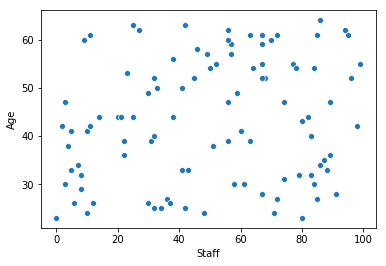

In [16]:
import pandas as pd #imports Pandas library 
import numpy as np #imports NumPy package
import seaborn as sns #imports Seaborn package
import matplotlib.pyplot as plt #imports Matplotlib library
 
np.random.seed(170380)#fixing seed for reproducibility
staff = np.random.choice(101, 100) #generates an array of 100 numbers between 1 and 100
staff_ages = np.random.randint(23, 65, 100)#generates an array of 100 numbers in a range from 23 to 65
sns.scatterplot(staff,staff_ages)#plots a scatterplot showing Staff on the x axis and Age on the Y axis
plt.xlabel("Staff")#labels the x axis of the scatterplot
plt.ylabel("Age")#labels the y axis of the scatterplot

In order to describe the shape of the distribution of staff ages in a clearer way, I decided to also plot this as a histogram -

Text(0,0.5,'Frequency')

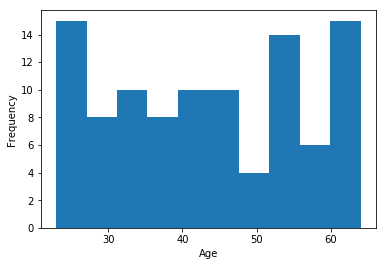

In [17]:
plt.hist(staff_ages)#plots histogram of Age
plt.xlabel("Age")#labels x axis
plt.ylabel("Frequency")#labels y axis 

The histogram above describes the distribution of the data as continuous normal. To derive the mean age of the data set I used the [numpy.mean](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.mean.html) function - 

In [18]:
np.mean(staff_ages, dtype=np.integer)#to print mean as integer rather than float 

43

Next I decided I needed to randomly assign these 100 vaccinated staff members to 4 different departments. I figured the best way to do this was to create a Pandas Dataframe and then generate the random values within that. After some online research I found [this post on stackoverflow.com](https://stackoverflow.com/questions/3589214/generate-multiple-random-numbers-to-equal-a-value-in-python) that recommended using the multinomial distribution from the [numpy.random.multinomial function](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multinomial.html) from NumPy's Random Sampling package. 

In [19]:
department = (["Accounts", "Engineering", "Administration", "Facilities"])#create a list of departmental name labels 
np.random.seed(170380)#fixing the seed for reproducibility 
#to assign 25 variables from "staff" to the 4 departments and create a dataframe of these values
df = pd.DataFrame(np.random.multinomial(100,[4/25.]*4, size=1)) #https://stackoverflow.com/questions/3589214/generate-multiple-random-numbers-to-equal-a-value-in-python
df.columns = (["Accounts", "Engineering", "Administration", "Facilities"])#constructs a Pandas DataFrame with the department names as column headers
df.index = (["Total"])#names the index of the DataFrame as Total 
print (df)#displays DataFrame

       Accounts  Engineering  Administration  Facilities
Total        16           19              16          49


To display the uptake of the vaccine, I used a barplot to chart the observations of vaccinated staff per department - 

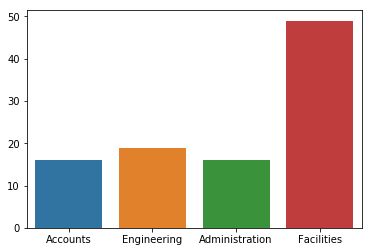

In [5]:
#to chart a bar plot that visually desdribes the vaccine uptake
sns.barplot(data=df)

To continue simulating the data I needed I chose to construct 4 separate Pandas DataFrames to represent 100 instances each of department, gender, age and how many times vaccinated in the previous 5 years - 

In [21]:
#allocate 100 instances of department
department = (["Accounts", "Engineering", "Administration", "Facilities"])#create list of department names
np.random.seed(170380)#fix seed for reproducibility
df1 = pd.DataFrame(np.random.choice (department, 100))#generate 100 random selections of the above list of department names
#allocate 100 instances of gender
gender = ["Male", "Female"]#create list of options for gender
np.random.seed(170380)#fix seed for reproducibility
df2 = pd.DataFrame(np.random.choice(gender, 100))#generate 100 random selections of gender 
#allocate 100 instances of number of times previously vaccinated in the past 5 years
np.random.seed(170380)#fix seed for reproducibility
df3 = pd.DataFrame(np.random.choice(5, 100))#generate 100 random selections between 0 and 5 to represent years that vaccine could have been availed of 
#create a DataFrame from earlier randomly generated NumPy array representing staff ages
df4 = pd.DataFrame(staff_ages)

Then I merged all 4 of these DataFrames together on the same axis and labelled the column headers -  

In [22]:
#to merge df1, df2, df4, df4 together into one DataFrame
merged_df = pd.concat([df4, df1, df2, df3], axis=1)#https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes
pd.set_option('display.max_row', 100)#amends number of displayed rows to 100 as per https://chrisalbon.com/python/data_wrangling/pandas_rename_multiple_columns/
merged_df.columns = ["Age", "Department", "Gender", "Previous Vaccine"]#labels column headers for merged DataFrame as per https://stackoverflow.com/questions/34338374/pandas-control-new-column-names-when-merging-two-dataframes
merged_df #dispays merged DataFrame

,Age,Department,Gender,Previous Vaccine
0,63,Engineering,Female,1
1,58,Administration,Male,4
2,44,Accounts,Male,1
3,57,Engineering,Female,2
4,32,Facilities,Female,3
5,63,Administration,Male,2
6,28,Administration,Male,4
7,61,Facilities,Female,0
8,38,Administration,Male,0
9,24,Facilities,Female,1


In [29]:
merged_df.describe()

,Age,Previous Vaccine
count,100.000000,100.000000
mean,43.280000,1.940000
std,12.600369,1.420058
min,23.000000,0.000000
25%,32.000000,1.000000
50%,42.500000,2.000000
75%,54.250000,3.000000
max,64.000000,4.000000
